In [1145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Wczytywanie danych

In [1146]:
heart_failure_data = pd.read_csv("heart_failure.csv")

### Eksploracja danych

In [1147]:
heart_failure_data.head(10)

,ID,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,0,40,140,289,172,0.0,0
1,1,49,160,180,156,1.0,1
2,2,37,130,283,98,0.0,0
3,3,48,138,214,108,1.5,1
4,4,54,150,195,122,0.0,0
5,5,39,120,339,170,0.0,0
6,6,45,130,237,170,0.0,0
7,7,54,110,208,142,0.0,0
8,8,37,140,207,130,1.5,1
9,9,48,120,284,120,0.0,0


In [1148]:
heart_failure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            918 non-null    int64  
 1   Age           918 non-null    int64  
 2   RestingBP     918 non-null    int64  
 3   Cholesterol   918 non-null    int64  
 4   MaxHR         918 non-null    int64  
 5   Oldpeak       918 non-null    float64
 6   HeartDisease  918 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 50.3 KB


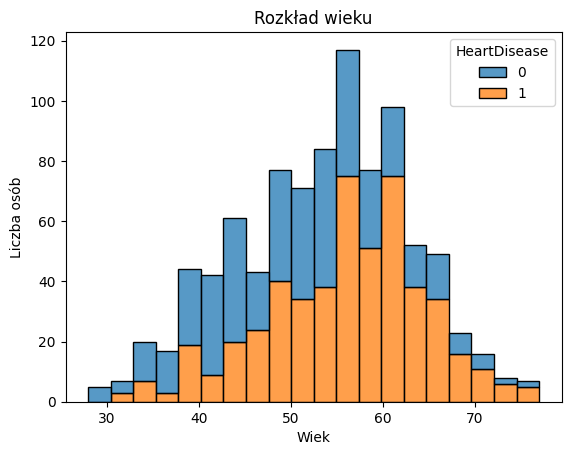

In [1149]:
shuffled_heart_failure_data = heart_failure_data.sample(frac=1, random_state=42).reset_index(drop=True)

sns.histplot(data=shuffled_heart_failure_data, x='Age', hue='HeartDisease', multiple='stack', bins=20)
plt.xlabel('Wiek')
plt.ylabel('Liczba osób')
plt.title('Rozkład wieku')
plt.show()

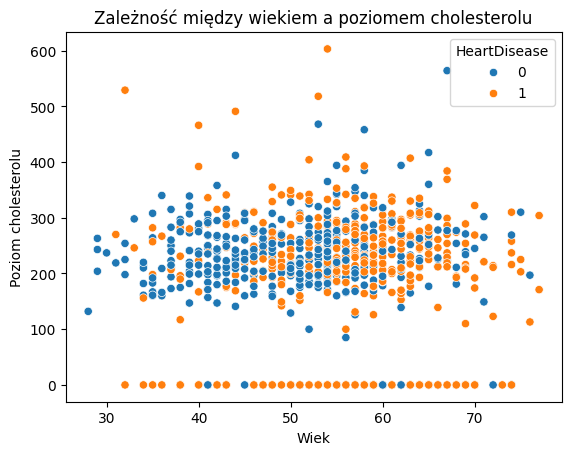

In [1150]:
sns.scatterplot(data=shuffled_heart_failure_data, x='Age', y='Cholesterol', hue='HeartDisease')
plt.xlabel('Wiek')
plt.ylabel('Poziom cholesterolu')
plt.title('Zależność między wiekiem a poziomem cholesterolu')
plt.show()

### Podział zbioru

In [1151]:
heart_failure_data_dropped = heart_failure_data.drop(columns=['ID'], inplace=False)
heart_failure_data_dropped

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,40,140,289,172,0.0,0
1,49,160,180,156,1.0,1
2,37,130,283,98,0.0,0
3,48,138,214,108,1.5,1
4,54,150,195,122,0.0,0
...,...,...,...,...,...,...
913,45,110,264,132,1.2,1
914,68,144,193,141,3.4,1
915,57,130,131,115,1.2,1
916,57,130,236,174,0.0,1


In [1152]:
heart_failure_data_selected = heart_failure_data_dropped[['Age', 'HeartDisease']]
heart_failure_data_selected

,Age,HeartDisease
0,40,0
1,49,1
2,37,0
3,48,1
4,54,0
...,...,...
913,45,1
914,68,1
915,57,1
916,57,1


#### Podział na zbiór testowy i treningowy

In [1153]:
from sklearn.model_selection import train_test_split

X = heart_failure_data_dropped.drop(columns=['HeartDisease'])
y = heart_failure_data_dropped['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Trenowanie modelu

In [1154]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors_classifier = KNeighborsClassifier(n_neighbors=5)


In [1155]:
k_neighbors_classifier.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [1156]:
X_predictions = k_neighbors_classifier.predict(X_test)
X_predictions[:10]
y_test[:10]

668    0
30     1
377    1
535    1
807    0
793    1
363    1
583    0
165    1
483    1
Name: HeartDisease, dtype: int64

In [1157]:
y_test == X_predictions

668     True
30      True
377    False
535     True
807     True
       ...  
211     True
745    False
584     True
878     True
451     True
Name: HeartDisease, Length: 184, dtype: bool

In [1158]:
np.sum(y_test == X_predictions)

np.int64(130)

In [1159]:
np.sum(y_test == X_predictions) / len(y_test)

np.float64(0.7065217391304348)

### Sprawdzanie Accuracy Score

In [1160]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, X_predictions)
accuracy

0.7065217391304348

<Axes: xlabel='Age', ylabel='Count'>

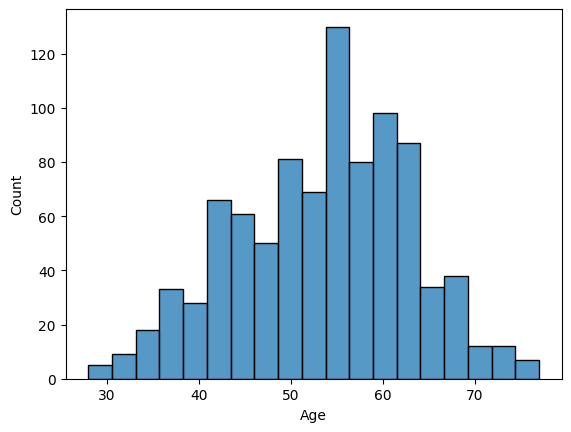

In [1161]:
sns.histplot(data=heart_failure_data, x='Age')

In [1162]:
np.sum(y_test == 1) / len(y_test)

np.float64(0.5815217391304348)

### Macierz pomyłek

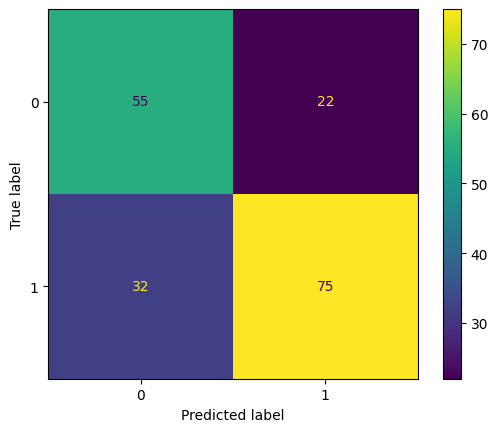

In [1163]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, X_predictions)

### Precision Score i Recall Score modelu

In [1164]:
from sklearn.metrics import recall_score, precision_score

precision_score(y_test, X_predictions)

0.7731958762886598

In [1165]:
recall_score(y_test, X_predictions)

0.7009345794392523

In [1166]:
# Precision Score i Recall Score obliczone ręcznie za pomocą wartości z macierzy pomyłek
TP = 75
FP = 22
FN = 32

precision = TP / (TP + FP)

recall = TP / (TP + FN)

print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")

Precision Score: 0.7731958762886598
Recall Score: 0.7009345794392523


### F1 Score

In [1167]:
from sklearn.metrics import f1_score

f1_score(y_test, X_predictions)

0.7352941176470589

### Wykres Precision & Recall Score

In [1168]:
from sklearn.metrics import precision_recall_curve

knn_precisions, knn_recalls, knn_thresholds = precision_recall_curve(y_test, X_predictions)

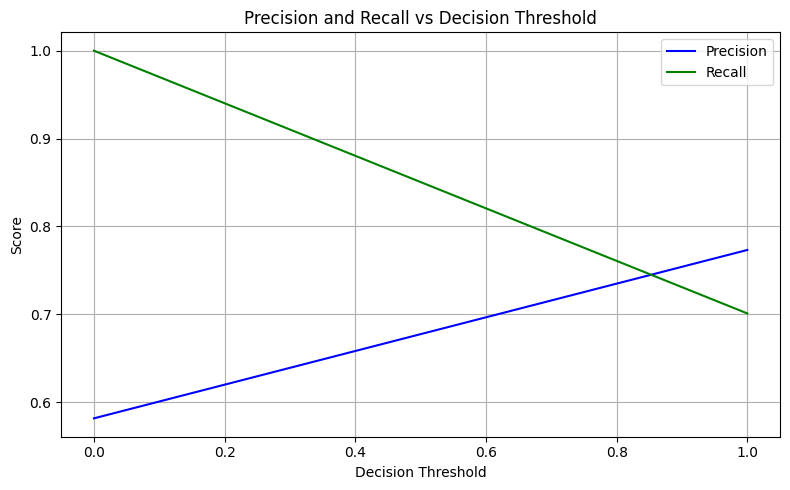

In [1169]:
plt.figure(figsize=(8, 5))
plt.plot( knn_thresholds, knn_precisions[:-1], label="Precision", color="blue")
plt.plot(knn_thresholds, knn_recalls[:-1], label="Recall", color="green")

plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Decision Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

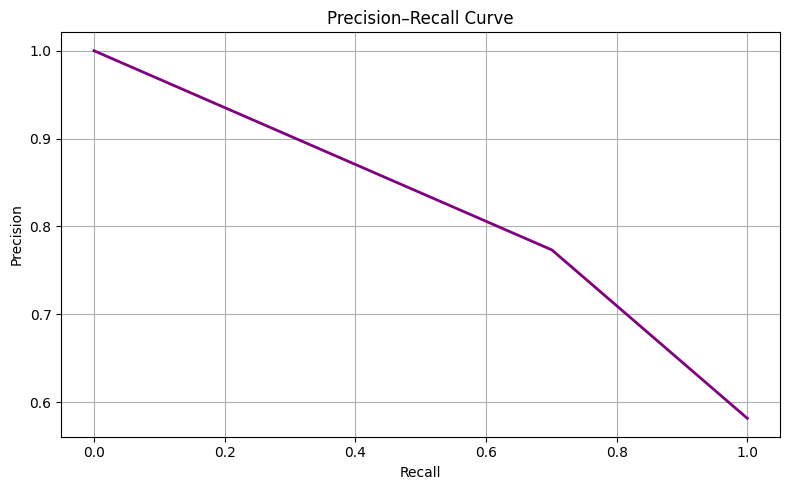

In [1170]:
plt.figure(figsize=(8, 5))
plt.plot(knn_recalls, knn_precisions, color="purple", lw=2)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.grid(True)
plt.tight_layout()
plt.show()

### Model LogisticRegression

In [1171]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [1172]:
logistic_regression_model_predictions = logistic_regression_model.predict(X_test)

### Wyniki modelu LogisticRegression

In [1173]:
print("Accuracy:", accuracy_score(y_test, logistic_regression_model_predictions))
print("Recall:", recall_score(y_test, logistic_regression_model_predictions))
print("Precision:", precision_score(y_test, logistic_regression_model_predictions))
print("F1:", f1_score(y_test, logistic_regression_model_predictions))

Accuracy: 0.717391304347826
Recall: 0.7289719626168224
Precision: 0.7722772277227723
F1: 0.75


### Model DecisionTreeClassifier

In [1174]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [1175]:
decision_tree_classifier_predictions = decision_tree_classifier.predict(X_test)

### Wyniki modelu DecisionThreeClassifier

In [1176]:
print("Accuracy:", accuracy_score(y_test, decision_tree_classifier_predictions))
print("Recall:", recall_score(y_test, decision_tree_classifier_predictions))
print("Precision:", precision_score(y_test, decision_tree_classifier_predictions))
print("F1:", f1_score(y_test, decision_tree_classifier_predictions))

Accuracy: 0.6902173913043478
Recall: 0.7289719626168224
Precision: 0.7358490566037735
F1: 0.7323943661971831


### Model GaussianNB

In [1177]:
from sklearn.naive_bayes import GaussianNB

gaussian_nb_classifier = GaussianNB()
gaussian_nb_classifier.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [1178]:
gaussian_nb_classifier_predictions = gaussian_nb_classifier.predict(X_test)

### Wyniki modelu GaussianNB

In [1179]:
print("Accuracy:", accuracy_score(y_test, gaussian_nb_classifier_predictions))
print("Recall:", recall_score(y_test, gaussian_nb_classifier_predictions))
print("Precision:", precision_score(y_test, gaussian_nb_classifier_predictions))
print("F1:", f1_score(y_test, gaussian_nb_classifier_predictions))

Accuracy: 0.7445652173913043
Recall: 0.7383177570093458
Precision: 0.8061224489795918
F1: 0.7707317073170732


### Model SVC

In [1180]:
from sklearn.svm import SVC

svc_classifier = SVC(probability=True, random_state=42)
svc_classifier.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [1181]:
svc_classifier_predictions = svc_classifier.predict(X_test)

### Wyniki modelu SVC

In [1182]:
print("Accuracy:", accuracy_score(y_test, svc_classifier_predictions))
print("Recall:", recall_score(y_test, svc_classifier_predictions))
print("Precision:", precision_score(y_test, svc_classifier_predictions))
print("F1:", f1_score(y_test, svc_classifier_predictions))

Accuracy: 0.6739130434782609
Recall: 0.6448598130841121
Precision: 0.7582417582417582
F1: 0.696969696969697


### Wykres Precision & Recall Score

In [1183]:
logistic_regression_probabilities = logistic_regression_model.predict_proba(X_test)[:, 1]

lr_precisions, lr_recalls, lr_thresholds = precision_recall_curve(y_test, logistic_regression_probabilities)

In [1184]:
decision_tree_classifier_probabilities = decision_tree_classifier.predict_proba(X_test)[:, 1]

dt_precisions, dt_recalls, dt_thresholds = precision_recall_curve(y_test, decision_tree_classifier_probabilities)

In [1185]:
gaussian_nb_classifier_probabilities = gaussian_nb_classifier.predict_proba(X_test)[:, 1]

gnb_precisions, gnb_recalls, gnb_thresholds = precision_recall_curve(y_test, gaussian_nb_classifier_probabilities)

In [1186]:
svc_classifier_probabilities = svc_classifier.predict_proba(X_test)[:, 1]

svc_precisions, svc_recalls, svc_thresholds = precision_recall_curve(y_test, svc_classifier_probabilities)

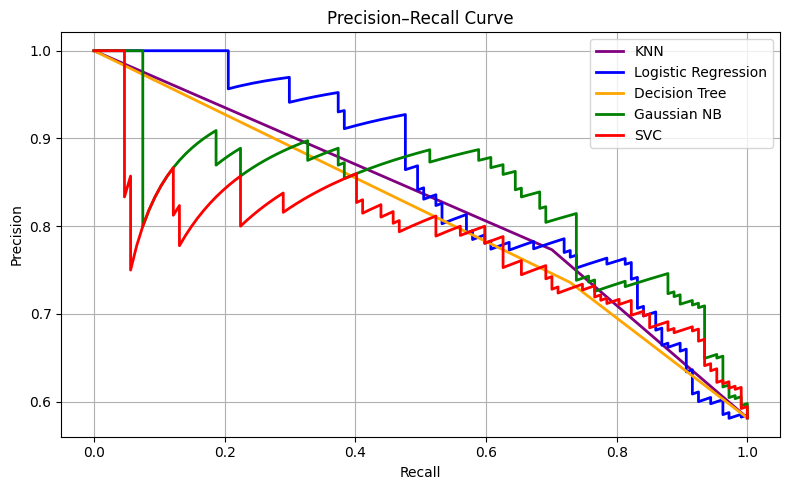

In [1187]:
plt.figure(figsize=(8, 5))
plt.plot(knn_recalls, knn_precisions, color="purple", lw=2, label="KNN")
plt.plot(lr_recalls, lr_precisions, color="blue", lw=2, label="Logistic Regression")
plt.plot(dt_recalls, dt_precisions, color="orange", lw=2, label="Decision Tree")
plt.plot(gnb_recalls, gnb_precisions, color="green", lw=2, label="Gaussian NB")
plt.plot(svc_recalls, svc_precisions, color="red", lw=2, label="SVC")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()